In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
dataset = pd.read_csv('/home/local/ZOHOCORP/kavin-11526/Downloads/salary_data.csv')

In [77]:
dataset.mean()


YearsExperience        5.313333
Salary             76003.000000
dtype: float64

Text(0, 0.5, 'Salary')

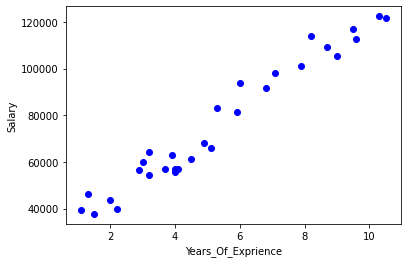

In [78]:
plt.plot(dataset.YearsExperience,dataset.Salary,"bo")
plt.xlabel("Years_Of_Exprience")
plt.ylabel("Salary")

In [79]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


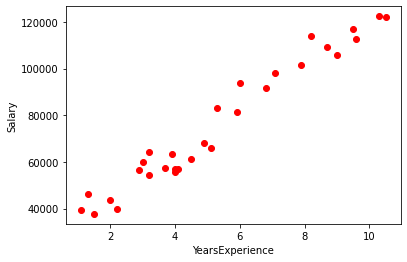

In [80]:
plt.scatter(dataset.YearsExperience,dataset.Salary, color = 'red', label = 'data points')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [102]:
type(dataset)

pandas.core.frame.DataFrame

In [103]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [104]:
theta = [0,0]

In [105]:
x = dataset["YearsExperience"]
y = dataset["Salary"]
x = np.array(x)
y = np.array(y)

In [106]:
u = x.mean()
std = x.std()
x = (x-u)/std

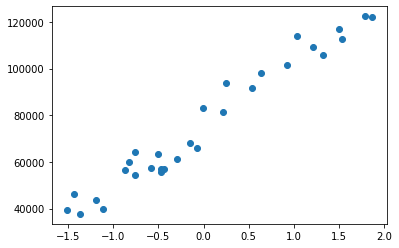

In [107]:
plt.scatter(x,y)

## Hypothesis

In [108]:
def hypothesis(theta, X):
    return theta[0] + theta[1]*X

## Cost function

In [109]:
def cost_calc(theta, X, y):
    m = X.shape[0]
    return (1/m) * np.sum((hypothesis(theta, X) - y)**2)

## Gradient descent

In [110]:
def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros(2)
    y_ = hypothesis(theta, X)
    grad[0] = np.sum(y_ - y)
    grad[1] = np.dot(X.T, (y_ - y))
    return grad/m

In [111]:
X_train,X_test,y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3,)

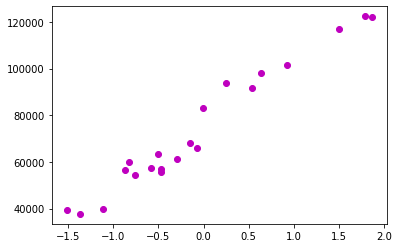

In [112]:
plt.scatter(X_train,y_train,color = "m",marker = "o")
plt.show()

In [113]:
def gradient_descent(x, y, learning=0.1, epoch=50 ):
    err_cost = [] 
    theta = np.zeros(2)
    for i in range(epoch):
        cost = cost_calc(theta, x, y)
        err_cost.append(cost)
        grad = gradient(x, y, theta)
        theta = theta - learning*grad
    return err_cost, theta

In [114]:
line , theta = gradient_descent(x,y)

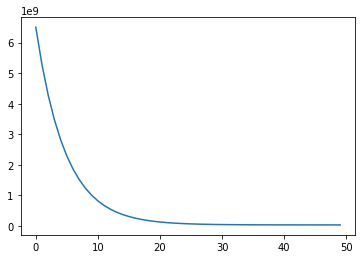

In [115]:
plt.plot(line)

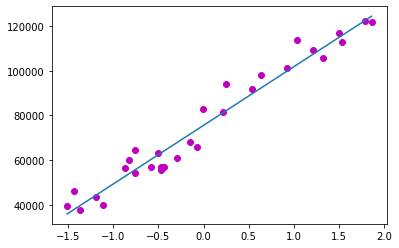

In [116]:
plt.scatter(x,y,color = "m",marker = "o")
y_ = hypothesis(theta,x)
plt.plot(x,y_)
plt.show()